In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, PowerTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks /Internship/Second Project/final_internship_data.csv', parse_dates = ['pickup_datetime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   User ID            500000 non-null  object        
 1   User Name          500000 non-null  object        
 2   Driver Name        500000 non-null  object        
 3   Car Condition      500000 non-null  object        
 4   Weather            500000 non-null  object        
 5   Traffic Condition  500000 non-null  object        
 6   key                500000 non-null  object        
 7   fare_amount        500000 non-null  float64       
 8   pickup_datetime    500000 non-null  datetime64[ns]
 9   pickup_longitude   500000 non-null  float64       
 10  pickup_latitude    500000 non-null  float64       
 11  dropoff_longitude  499995 non-null  float64       
 12  dropoff_latitude   499995 non-null  float64       
 13  passenger_count    500000 non-null  int64   

In [5]:
df.describe()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,500000.000000,500000,500000.000000,500000.000000,499995.000000,499995.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358361,2012-03-21 00:01:25.930808064,-1.265712,0.696740,-1.265755,0.696675,1.683428,13.510834,15.684206,6.268650,3.042008,2011.739132,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
min,-44.900000,2009-01-01 00:31:32,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,2010-08-19 21:02:24,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,2012-03-18 19:23:52.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,2013-10-19 05:43:45,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,2015-06-30 23:38:21,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593
std,9.916617,NaN,0.206941,0.140909,0.205903,0.128997,1.307395,6.511571,8.681066,3.437815,1.949240,1.860889,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548


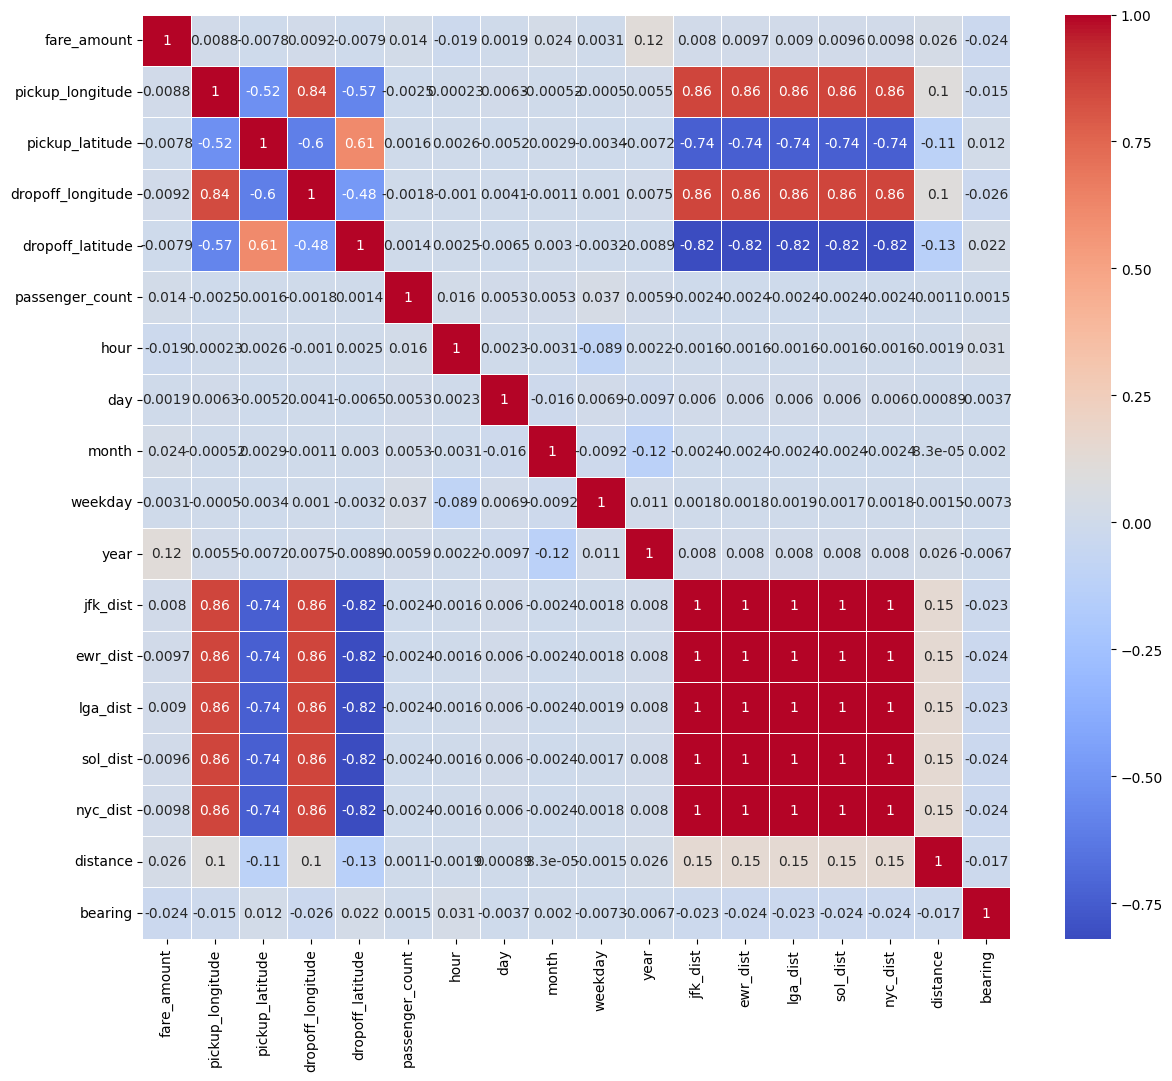

In [6]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (14, 12))
sns.heatmap(corr, cmap = 'coolwarm', annot = True, linewidth = 0.5)
plt.show()

In [7]:
numerical_features = df.select_dtypes(include = (int, float))
numerical_features.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist', 'distance', 'bearing'],
      dtype='object')

In [8]:
categorical_features = df.select_dtypes(object)
categorical_features.columns

Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key'],
      dtype='object')

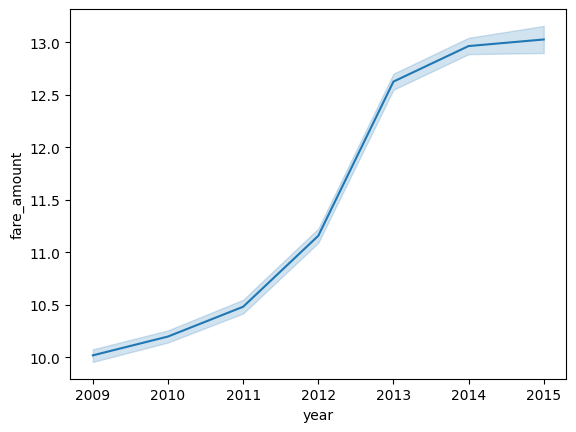

In [9]:
sns.lineplot(data = df, x = 'year', y = 'fare_amount')
plt.show()

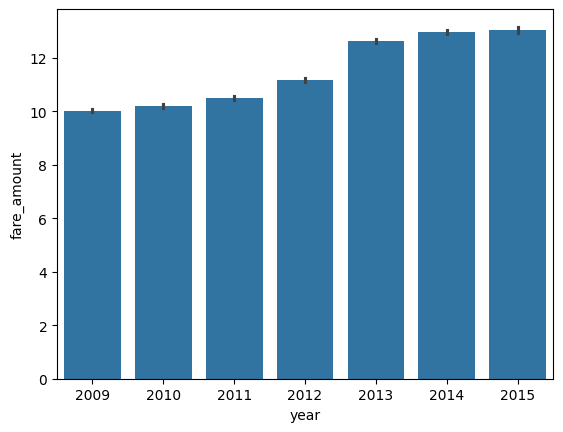

In [10]:
sns.barplot(data = df, x = 'year', y = 'fare_amount')
plt.show()

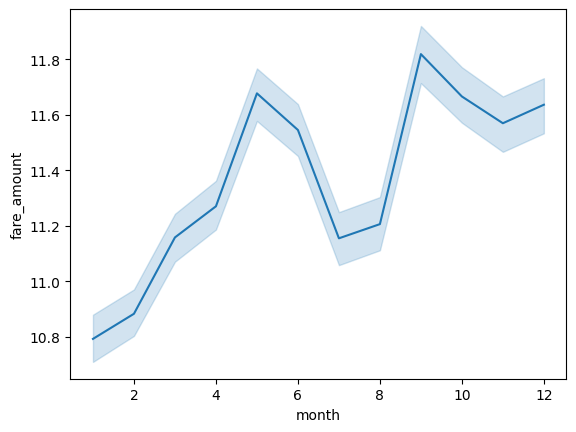

In [11]:
sns.lineplot(data = df, x = 'month', y = 'fare_amount')
plt.show()

In [12]:
q1_distance = df['distance'].quantile(0.3)
q2_distance = df['distance'].quantile(0.99)
min = df['distance'].min()
max = df['distance'].max()
print(f" 30th percentile: {q1_distance}\n 99th percentile: {q2_distance}\n Minimum Value: {min}\n Maximum Value: {max}")

 30th percentile: 1.3719603644598044
 99th percentile: 20.654822033858792
 Minimum Value: 0.0
 Maximum Value: 12399.956432774516


In [13]:
q1_fare = df['fare_amount'].quantile(0.01)
q2_fare = df['fare_amount'].quantile(0.95)
fare_amount_min_value = df['fare_amount'].min()
fare_amount_max_value = df['fare_amount'].max()

print(f" 10th percentile: {q1_fare}\n 99th percentile: {q2_fare}\n Minimum Value: {fare_amount_min_value}\n Maximum Value: {fare_amount_max_value}")

 10th percentile: 3.3
 99th percentile: 30.5
 Minimum Value: -44.9
 Maximum Value: 500.0


In [14]:
# for column in numerical_features.columns:

#   sns.displot(data = df, x = column, kind = 'kde', rug = True, fill = True, cut = 0)
#   plt.show()

In [15]:
# for column in numerical_features.columns:

#   sns.boxplot(data = df, x = column)
#   plt.show()

In [16]:
print(df.duplicated().sum())

0


In [17]:
features = df.drop(['fare_amount', 'User ID', 'User Name', 'Driver Name', 'key', 'pickup_datetime'], axis = 1)
target = df['fare_amount']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [18]:
main_categorical_features = categorical_features.drop(['User ID', 'User Name', 'Driver Name', 'key'], axis = 1)

x_train[main_categorical_features.columns].head()

,Car Condition,Weather,Traffic Condition
226114,Very Good,cloudy,Flow Traffic
435187,Bad,windy,Dense Traffic
294452,Very Good,stormy,Flow Traffic
427864,Bad,sunny,Dense Traffic
188822,Good,cloudy,Congested Traffic


In [19]:
for column in main_categorical_features.columns:
  order = df.groupby(column)['fare_amount'].mean()
  print(order, '\n')

Car Condition
Bad          11.326173
Excellent    11.355140
Good         11.336253
Very Good    11.415716
Name: fare_amount, dtype: float64 

Weather
cloudy    11.380028
rainy     11.357874
stormy    11.346383
sunny     11.358210
windy     11.349251
Name: fare_amount, dtype: float64 

Traffic Condition
Congested Traffic    11.390527
Dense Traffic        11.368120
Flow Traffic         11.316381
Name: fare_amount, dtype: float64 



In [20]:
car_conditions = ['Bad', 'Good', 'Excellent', 'Very Good']

weather_conditions = ['stormy', 'windy', 'rainy', 'sunny', 'cloudy']

traffic_conditions = ['Flow Traffic', 'Dense Traffic', 'Congested Traffic']


categories = [car_conditions, weather_conditions, traffic_conditions]

ordinal_encoder = OrdinalEncoder(categories = categories)

x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()

x_train_encoded[main_categorical_features.columns] = ordinal_encoder.fit_transform(x_train[main_categorical_features.columns])
x_test_encoded[main_categorical_features.columns] = ordinal_encoder.transform(x_test[main_categorical_features.columns])
x_test_encoded[main_categorical_features.columns].head()

,Car Condition,Weather,Traffic Condition
104241,1.0,3.0,2.0
199676,0.0,2.0,0.0
140199,1.0,4.0,1.0
132814,2.0,0.0,1.0
408697,3.0,0.0,1.0


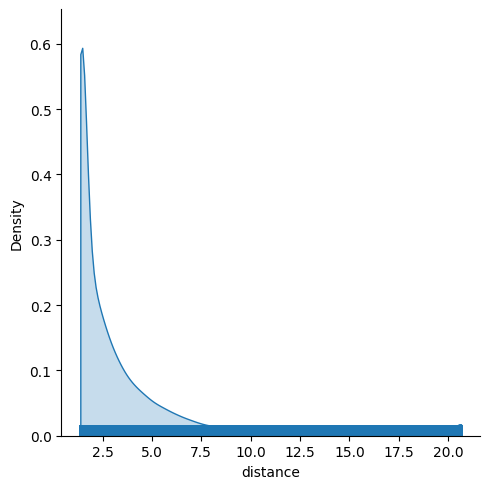

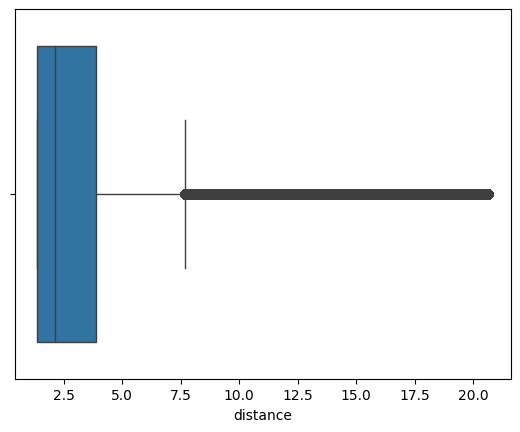

In [39]:
distance_lower_bound = q1_distance
distance_upper_bound = q2_distance
x_train_encoded['distance'] = x_train['distance'].clip(distance_lower_bound, distance_upper_bound)

sns.displot(data = x_train_encoded, x = 'distance', kind = 'kde', rug = True, fill = True, cut = 0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/distance after preprocessing.png')
plt.show()

sns.boxplot(data = x_train_encoded, x = 'distance')
plt.show()

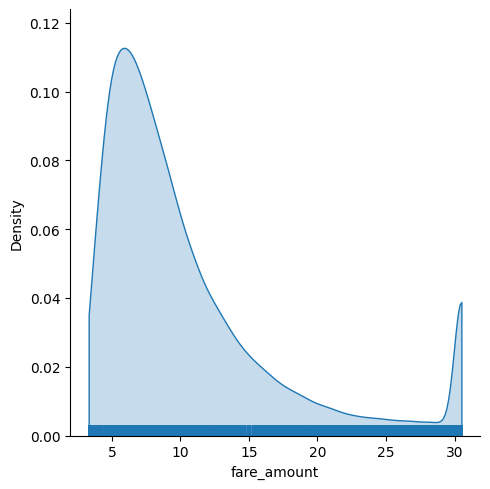

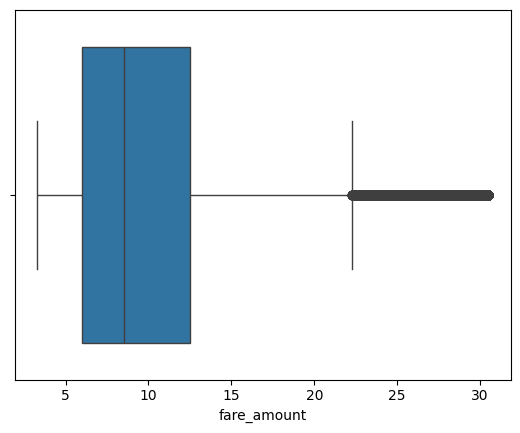

In [40]:
fare_lower_bound = q1_fare
fare_upper_bound = q2_fare

y_train = pd.DataFrame(y_train)

y_train = y_train.clip(fare_lower_bound, fare_upper_bound)

sns.displot(data = y_train, x = 'fare_amount', kind = 'kde', rug = True, fill = True, cut = 0)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/fare_amount after preprocessing.png')
plt.show()

sns.boxplot(data = y_train, x = 'fare_amount')
plt.show()

In [42]:
print(x_train_encoded.isnull().sum())

Car Condition        0
Weather              0
Traffic Condition    0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    4
dropoff_latitude     4
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             4
ewr_dist             4
lga_dist             4
sol_dist             4
nyc_dist             4
distance             4
bearing              4
dtype: int64


In [43]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
x_train_imputed = x_train_encoded.copy()
x_test_imputed = x_test_encoded.copy()

main_numerical_features = numerical_features.drop('fare_amount', axis = 1)

x_train_imputed[main_numerical_features.columns] = imputer.fit_transform(x_train_encoded[main_numerical_features.columns])
x_test_imputed[main_numerical_features.columns] = imputer.transform(x_test_encoded[main_numerical_features.columns])
print(x_train_imputed.isnull().sum())

Car Condition        0
Weather              0
Traffic Condition    0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64


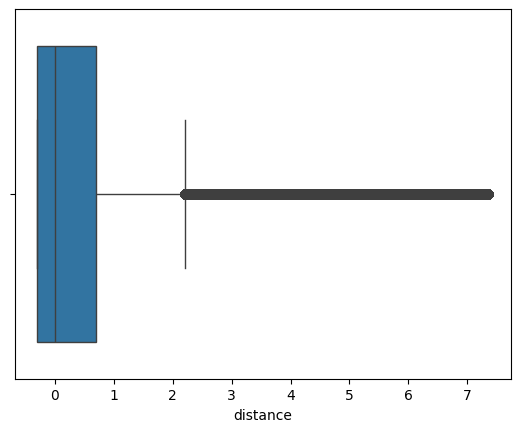

In [52]:
x_train_scaled = x_train_imputed.copy()
x_test_scaled = x_test_imputed.copy()


robust_scaler = RobustScaler()
power_transformer = PowerTransformer()

x_train_scaled[main_numerical_features.columns] = robust_scaler.fit_transform(x_train_imputed[main_numerical_features.columns])
x_test_scaled[main_numerical_features.columns] = robust_scaler.transform(x_test_imputed[main_numerical_features.columns])

# sns.displot(data = x_train_scaled, x = 'distance', kind = 'kde', rug = True, fill = True, cut = 0)
# plt.show()

sns.boxplot(data = x_train_scaled, x = 'distance')
plt.show()

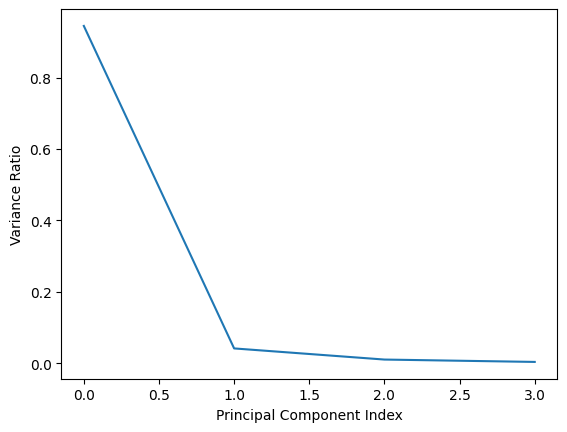

[0.9451606  0.98645335 0.99654244 1.        ]


In [26]:
pca_features1 = ['pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude']

pca_features2 = ['jfk_dist', 'ewr_dist', 'lga_dist',
       'sol_dist', 'nyc_dist']

pca = PCA()

pca.fit(x_train_scaled[pca_features1])

var = pca.explained_variance_ratio_

plt.plot(var)

plt.xlabel("Principal Component Index")
plt.ylabel("Variance Ratio")
plt.savefig('PCA Plot')
plt.show()

print(var.cumsum())

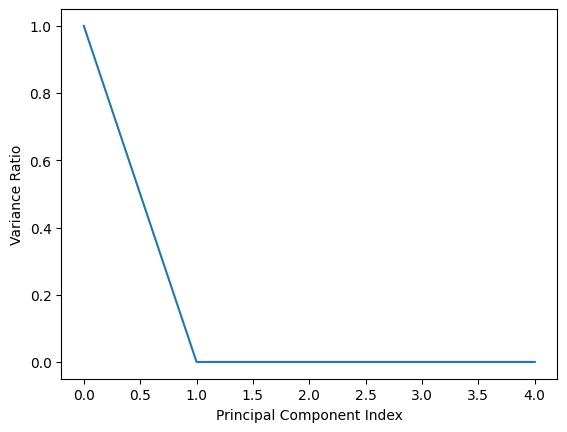

[0.99999715 0.9999992  0.99999996 1.         1.        ]


In [27]:
pca.fit(x_train_scaled[pca_features2])

var = pca.explained_variance_ratio_

plt.plot(var)
plt.xlabel('Principal Component Index')
plt.ylabel('Variance Ratio')
plt.show()

print(var.cumsum())

In [28]:
pca1 = PCA(n_components = 2)

pca2 = PCA(n_components = 1)

pca_columns_train1 = pd.DataFrame(pca1.fit_transform(x_train_scaled[pca_features1]), columns = ['PC1', 'PC2'])
pca_columns_test1 = pd.DataFrame(pca1.transform(x_test_scaled[pca_features1]), columns = ['PC1', 'PC2'])

pca_columns_train2 = pd.DataFrame(pca2.fit_transform(x_train_scaled[pca_features2]), columns = ['PC3'])
pca_columns_test2 = pd.DataFrame(pca2.transform(x_test_scaled[pca_features2]), columns = ['PC3'])

# pca_columns_train
x_train_pca = x_train_scaled.copy()
x_test_pca = x_test_scaled.copy()

x_train_pca = pd.concat([x_train_scaled.drop(columns = pca_features1 + pca_features2).reset_index(drop = True), pca_columns_train1, pca_columns_train2], axis = 1)
x_test_pca = pd.concat([x_test_scaled.drop(columns = pca_features1 + pca_features2).reset_index(drop = True), pca_columns_test1, pca_columns_test2], axis = 1)
x_test_pca

,Car Condition,Weather,Traffic Condition,passenger_count,hour,day,month,weekday,year,distance,bearing,PC1,PC2,PC3
0,1.0,3.0,2.0,0.0,0.4,0.866667,0.166667,-0.25,-1.000000,5.100589,0.175413,-78.057162,-3.354525,-184.425896
1,0.0,2.0,0.0,0.0,-0.6,0.333333,-0.333333,-0.75,0.666667,-0.255309,-0.935049,-85.927501,-0.543501,-178.800157
2,1.0,4.0,1.0,0.0,-0.2,0.600000,0.166667,-0.75,-0.333333,0.011080,-0.152080,-86.043048,-0.441176,-178.660872
3,2.0,0.0,1.0,0.0,0.0,-0.866667,0.166667,-0.25,0.333333,-0.839865,0.015627,4258.092457,19.789583,8775.783162
4,3.0,0.0,1.0,1.0,0.3,0.266667,-0.500000,0.75,-0.333333,3.003013,-0.439754,-84.807021,2.193223,-179.757994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1.0,0.0,1.0,0.0,-0.4,0.800000,-0.833333,-0.25,1.000000,-0.392936,0.528326,-86.695860,-0.930017,-179.622749
149996,1.0,0.0,0.0,0.0,-0.7,0.000000,-0.166667,0.00,0.333333,1.387406,0.415439,-83.839002,-2.412946,-180.742400
149997,0.0,0.0,2.0,0.0,0.0,-0.066667,-0.500000,-0.50,-0.333333,-0.589766,0.446890,-86.885711,-0.832212,-178.698261
149998,2.0,0.0,1.0,1.0,0.8,-0.733333,0.000000,0.00,0.666667,-0.312531,-0.371456,-86.026735,-0.315502,-179.070267


In [29]:
dt = DecisionTreeRegressor()

dt.fit(x_train_pca, y_train)

predictions = dt.predict(x_test_pca)

MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print(MSE, RMSE, MAE, R2)

42.74045341733333 6.537618329126696 2.935800800000001 0.5618909853329833


In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'max_depth' : [10, 20, 30, 40, 50],
    'min_samples_split' : [2, 5, 10, 20]
}

dt_cv = RandomizedSearchCV(dt, param_grid, cv=kf, n_iter=2)
dt_cv.fit(x_train_pca, y_train)
print(dt_cv.best_params_, dt_cv.best_score_)

{'min_samples_split': 10, 'max_depth': 30} 0.731928511254215


In [31]:
knn = KNeighborsRegressor()

knn.fit(x_train_pca, y_train)

predictions = knn.predict(x_test_pca)

MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print(MSE, RMSE, MAE, R2)

38.80627231469334 6.229468060331744 2.8492159066666667 0.6022181243450416


In [35]:
# 1. Create polynomial features of degree 2 (can be 3, 4, etc.)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# 2. Fit the model
poly_model.fit(x_train_pca, y_train)

# 3. Predict
y_pred = poly_model.predict(x_test_pca)

MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print(MSE, RMSE, MAE, R2)

38.80627231469334 6.229468060331744 2.8492159066666667 0.6022181243450416


In [37]:
gb = GradientBoostingRegressor()

gb.fit(x_train_pca, y_train)

predictions = gb.predict(x_test_pca)

MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print(MSE, RMSE, MAE, R2)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


36.3338229663521 6.027754388356588 2.42374863223872 0.6275618505156347


In [38]:
adaboost = AdaBoostRegressor()

adaboost.fit(x_train_pca, y_train)

predictions = adaboost.predict(x_test_pca)

MSE = mean_squared_error(y_test, predictions)
RMSE = root_mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)

print(MSE, RMSE, MAE, R2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


46.17636203037709 6.795319126455879 3.4805681204471655 0.5266713651233379
